In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Fifa = pd.read_csv('/Users/omaralamri/Desktop/Python for Data Science Course /DataSets/data.csv', sep=',')
Fifa.shape

(18207, 89)

In [3]:
Fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
Fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

# Clean the Data

* Drop Unnecessary columns and keep the ones that we need in the analysis.
* Drop any null or dublicated values.
* Remove € and K from Value column and change its data type to Integer.

### Drop Columns

In [5]:
Fifa.drop(['Unnamed: 0', 'ID', 'Photo', 'Flag', 'Club Logo', 'Special', 'International Reputation', 'Weak Foot',
           'Work Rate', 'Skill Moves', 'Real Face', 'Loaned From', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
           'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
           'RCB', 'RB', 'Crossing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Curve', 'FKAccuracy',
           'Marking', 'StandingTackle', 'LongPassing', 'Acceleration', 'Agility','Reactions','Balance',
           'ShotPower', 'Stamina', 'Jumping', 'Aggression', 'Positioning', 'Vision', 'Penalties',
           'Interceptions', 'SlidingTackle', 'Strength', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning',
           'GKReflexes', 'Body Type', 'Finishing', 'SprintSpeed', 'Composure', 'Finishing', 'LongShots'], axis = 1, inplace = True)

In [6]:
Fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Dribbling,BallControl,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,97.0,96.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,88.0,94.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,96.0,95.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,18.0,42.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,86.0,91.0,€196.4M


### Is there any Null values?

In [7]:
Fifa.isnull().any()

Name                    False
Age                     False
Nationality             False
Overall                 False
Potential               False
Club                     True
Value                   False
Wage                    False
Preferred Foot           True
Position                 True
Jersey Number            True
Joined                   True
Contract Valid Until     True
Height                   True
Weight                   True
Dribbling                True
BallControl              True
Release Clause           True
dtype: bool

### Drop null and dublicated values

In [8]:
Fifa.drop_duplicates(inplace=True)
Fifa.dropna(inplace=True)

### Checking if there are any duplicate or Null values

In [9]:
nan_df = Fifa[Fifa.isna().any(axis=1)]
nan_df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Dribbling,BallControl,Release Clause


### Remove € and K from Value Column

In [10]:
Fifa['Value'] = Fifa['Value'].replace({'K': '*1e3', 'M': '*1e6', '€':''}, regex=True).map(pd.eval).astype(int)

# General Analysis

### How many clubs?

In [11]:
clubs = Fifa['Club'].unique().tolist()
print(len(clubs))

651


### How Many Player?

In [12]:
Plyers = Fifa['Name'].unique().tolist()
print(len(Plyers))

15773


### How many countries?

In [13]:
Fifa.Nationality.nunique()

161

### Top 10 Most Valuable Clubs

In [14]:
value = Fifa.groupby(['Club'],as_index=False)['Value'].sum()
Top_Value = value.sort_values(ascending = False,by='Value')[:10]
Top_Value['Value'] = Top_Value['Value']
Top_Value

,Club,Value
470,Real Madrid,874425000
212,FC Barcelona,852600000
374,Manchester City,786555000
326,Juventus,704475000
61,Atlético Madrid,644525000
435,Paris Saint-Germain,625325000
583,Tottenham Hotspur,618450000
214,FC Bayern München,609525000
375,Manchester United,588850000
363,Liverpool,585055000


### Top 10 Most Valuable Players

In [15]:
Fifa[['Name', 'Club', 'Value' ]].sort_values(by="Value", ascending=False).head(10)

,Name,Club,Value
2,Neymar Jr,Paris Saint-Germain,118500000
0,L. Messi,FC Barcelona,110500000
4,K. De Bruyne,Manchester City,102000000
5,E. Hazard,Chelsea,93000000
15,P. Dybala,Juventus,89000000
16,H. Kane,Tottenham Hotspur,83500000
25,K. Mbappé,Paris Saint-Germain,81000000
7,L. Suárez,FC Barcelona,80000000
17,A. Griezmann,Atlético Madrid,78000000
1,Cristiano Ronaldo,Juventus,77000000


In [16]:
player = Fifa.groupby(['Name'],  as_index=False)['Value'].sum()
Valuable_Players = player.sort_values(ascending = False,by='Value')[:10]

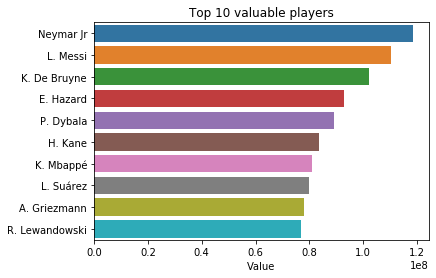

In [17]:

players = list(Valuable_Players.Name)
plt.title('Top 10 valuable players')
sns.barplot(x=Valuable_Players.Value, y=players, data=Valuable_Players)

### What is the most preferred foot?

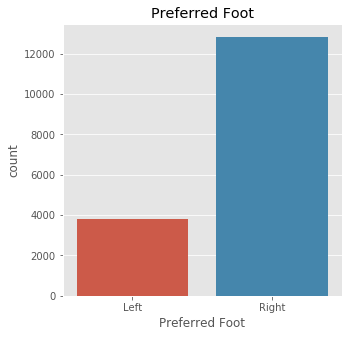

In [18]:
plt.figure(figsize = (5,5))
plt.style.use('ggplot')
sns.countplot(x=Fifa['Preferred Foot'])
plt.title("Preferred Foot")
plt.show()

In [19]:
preferred_foot = Fifa['Preferred Foot'].value_counts().reset_index()
preferred_foot.columns = ['Foot', "Total Players"]
preferred_foot = preferred_foot.set_index('Foot')
preferred_foot

,Total Players
Foot,
Right,12823
Left,3820


### Top 5 right-footed players

In [20]:
Fifa[Fifa['Preferred Foot'] == 'Right'][['Name','Overall']].head()


,Name,Overall
1,Cristiano Ronaldo,94
2,Neymar Jr,92
3,De Gea,91
4,K. De Bruyne,91
5,E. Hazard,91


### Top 5 left-footed players

In [21]:
Fifa[Fifa['Preferred Foot'] == 'Left'][['Name','Overall']].head()


,Name,Overall
0,L. Messi,94
13,David Silva,90
15,P. Dybala,89
17,A. Griezmann,89
19,T. Courtois,89


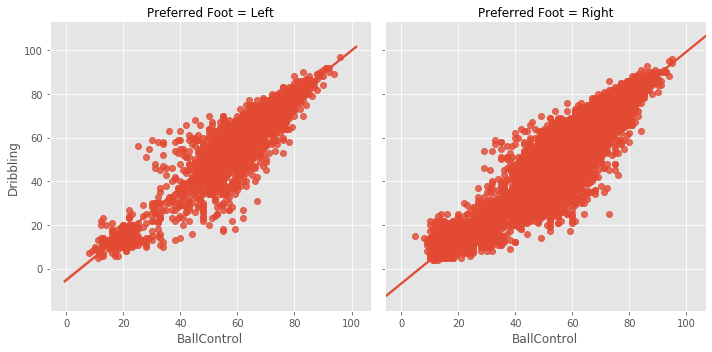

In [22]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = Fifa, col = 'Preferred Foot')

## Number of players per Position

In [23]:
position_count = Fifa.groupby('Position').count()
position_count = position_count['Name']
position_count

Position
CAM     877
CB     1646
CDM     873
CF       66
CM     1276
GK     1900
LAM      20
LB     1223
LCB     595
LCM     353
LDM     224
LF       15
LM     1012
LS      184
LW      338
LWB      76
RAM      21
RB     1199
RCB     615
RCM     355
RDM     228
RF       13
RM     1022
RS      179
RW      325
RWB      84
ST     1924
Name: Name, dtype: int64

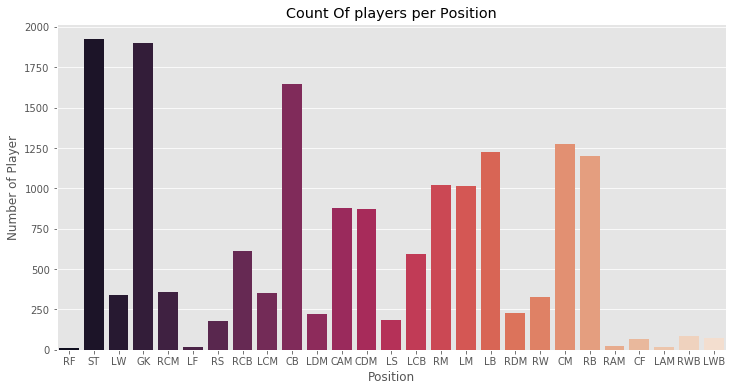

In [24]:

plt.figure(figsize=(12,6))
sns.countplot(Fifa['Position'], palette='rocket')
plt.title('Count Of players per Position')
plt.xlabel('Position')
plt.ylabel('Number of Player')
plt.show()

###  Best players for each position

In [25]:
3# best players per each position with their age, club, and nationality based on their overall scores

Fifa.iloc[Fifa.groupby(Fifa['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality', 'Overall']]


,Position,Name,Age,Club,Nationality,Overall
17,CAM,A. Griezmann,27,Atlético Madrid,France,89
12,CB,D. Godín,32,Atlético Madrid,Uruguay,90
20,CDM,Sergio Busquets,29,FC Barcelona,Spain,89
276,RB,Mário Fernandes,27,PFC CSKA Moscow,Russia,82
69,RB,Azpilicueta,28,Chelsea,Spain,86
3,GK,De Gea,27,Manchester United,Spain,91
373,CB,K. Vogt,26,TSG 1899 Hoffenheim,Germany,81
36,ST,G. Bale,28,Real Madrid,Wales,88
24,LCB,G. Chiellini,33,Juventus,Italy,89
11,LCM,T. Kroos,28,Real Madrid,Germany,90


###  Most countries by number of players

In [26]:
from collections import Counter
print(Counter(Fifa['Nationality'].values))
print(Counter(Fifa['Nationality'].values).most_common(5))

Counter({'England': 1475, 'Germany': 1151, 'Spain': 974, 'France': 853, 'Argentina': 833, 'Brazil': 788, 'Italy': 579, 'Colombia': 570, 'Japan': 455, 'Netherlands': 426, 'Sweden': 384, 'China PR': 378, 'Chile': 352, 'Republic of Ireland': 344, 'United States': 336, 'Poland': 334, 'Norway': 333, 'Mexico': 332, 'Denmark': 322, 'Korea Republic': 315, 'Saudi Arabia': 313, 'Turkey': 293, 'Portugal': 290, 'Austria': 286, 'Scotland': 269, 'Belgium': 231, 'Australia': 224, 'Switzerland': 205, 'Uruguay': 133, 'Wales': 116, 'Serbia': 116, 'Senegal': 114, 'Croatia': 113, 'Nigeria': 109, 'Ghana': 102, 'Greece': 98, 'Czech Republic': 93, 'Cameroon': 85, 'Ivory Coast': 83, 'Morocco': 79, 'Ukraine': 72, 'Northern Ireland': 70, 'Russia': 67, 'Finland': 64, 'Paraguay': 59, 'Canada': 58, 'Bosnia Herzegovina': 57, 'Algeria': 56, 'South Africa': 55, 'Venezuela': 52, 'Slovakia': 50, 'Slovenia': 48, 'DR Congo': 48, 'Mali': 38, 'Romania': 38, 'Albania': 37, 'Iceland': 34, 'New Zealand': 34, 'Jamaica': 32, 'K

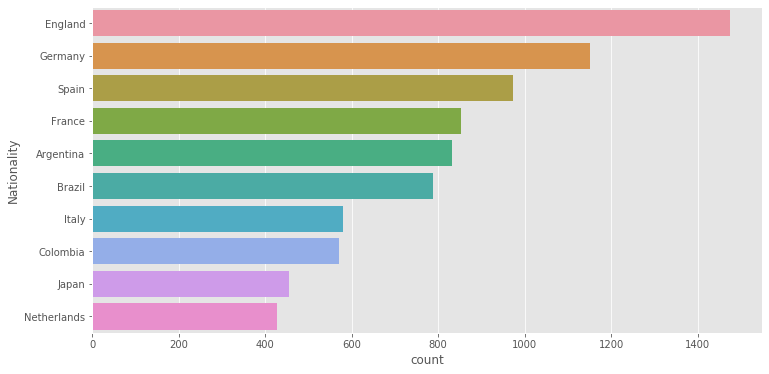

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(y = 'Nationality', data=Fifa, order = Fifa.Nationality.value_counts().iloc[:10].index);

### What is the average age of the players?

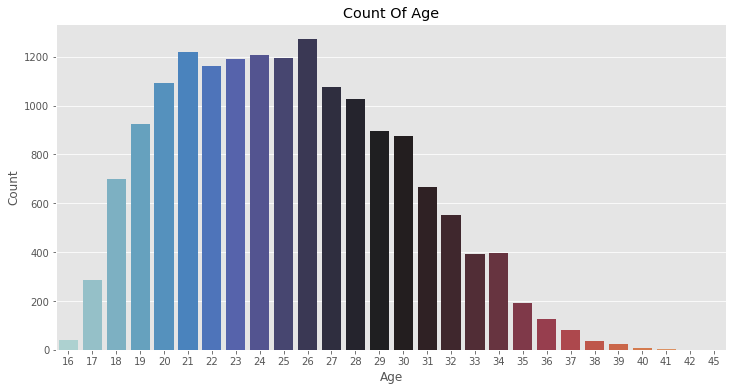

In [28]:

plt.figure(figsize=(12,6))
sns.countplot(Fifa['Age'],palette="icefire")
plt.title('Count Of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [29]:
print("The Minimum Age is: ", Fifa['Age'].min(),";\n", 
      "The maximum age is: ", Fifa['Age'].max(),";\n",
      "The average age is: ", Fifa['Age'].mean())

The Minimum Age is:  16 ;
 The maximum age is:  45 ;
 The average age is:  25.226221234152497


## Top 10 Oldest Players

In [30]:

player_data=Fifa[['Name','Age','Nationality','Club', 'Position','Potential','Wage']]

player_data.sort_values('Age',ascending=False).head(10)

,Name,Age,Nationality,Club,Position,Potential,Wage
4741,O. Pérez,45,Mexico,Pachuca,GK,71,€8K
10545,S. Narazaki,42,Japan,Nagoya Grampus,GK,65,€1K
7225,C. Muñoz,41,Argentina,CD Universidad de Concepción,GK,68,€1K
15426,M. Tyler,41,England,Peterborough United,GK,59,€1K
41,G. Buffon,40,Italy,Paris Saint-Germain,GK,88,€77K
16264,P. van der Vlag,40,Netherlands,FC Emmen,GK,58,€1K
16596,A. Al Basisi,40,Saudi Arabia,Ohod Club,GK,57,€1K
9484,B. Castillo,40,Colombia,Atlético Huila,GK,66,€1K
4187,C. Lucchetti,40,Argentina,Atlético Tucumán,GK,71,€4K
2821,S. Bertoli,40,Argentina,Patronato,GK,73,€6K


## Top 10 Yungest Players

In [31]:
player_data.sort_values('Age',ascending=True).head(10)

,Name,Age,Nationality,Club,Position,Potential,Wage
18206,G. Nugent,16,England,Tranmere Rovers,CM,66,€1K
17841,F. Tauchhammer,16,Austria,Wolfsberger AC,RB,71,€1K
18124,G. Hollywood,16,Republic of Ireland,Bray Wanderers,CM,67,€1K
17808,A. Mahlonoko,16,South Africa,Orlando Pirates,CAM,71,€1K
17115,C. Bassett,16,United States,Colorado Rapids,CDM,77,€1K
15793,J. Lahne,16,Sweden,IF Brommapojkarna,ST,77,€1K
17776,M. Köstenbauer,16,Austria,FC Admira Wacker Mödling,GK,74,€1K
16927,B. Nygren,16,Sweden,IFK Göteborg,ST,73,€1K
17757,L. Smyth,16,Northern Ireland,Stevenage,ST,73,€1K
15746,Y. Begraoui,16,France,AJ Auxerre,ST,81,€1K


### Does the overall rating affect the player's value?

In [32]:
overall_rating = Fifa.groupby("Name", as_index=False)["Value","Overall"].mean()
overall_rating.sort_values(by="Overall",inplace=True,ascending=False)
overall_rating.head(10)

,Name,Value,Overall
2866,Cristiano Ronaldo,77000000.0,94.0
8824,L. Messi,110500000.0,94.0
11473,Neymar Jr,118500000.0,92.0
9014,L. Suárez,80000000.0,91.0
4033,E. Hazard,93000000.0,91.0
14128,Sergio Ramos,51000000.0,91.0
3776,De Gea,72000000.0,91.0
8832,L. Modrić,67000000.0,91.0
7896,K. De Bruyne,102000000.0,91.0
7112,J. Oblak,68000000.0,90.0


### Does Age have an Impact on Potential?


Text(0.5, 1.0, 'Age vs Potential')

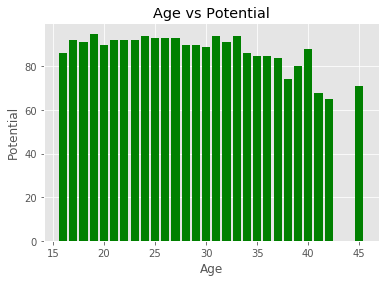

In [33]:

# bar-plot for Age and Potential
plt.bar(Fifa['Age'], Fifa['Potential'], color = 'green')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.title("Age vs Potential")
# Potential falls with increase in age

### How does the overall rating of Spanish clubs differ from each other?

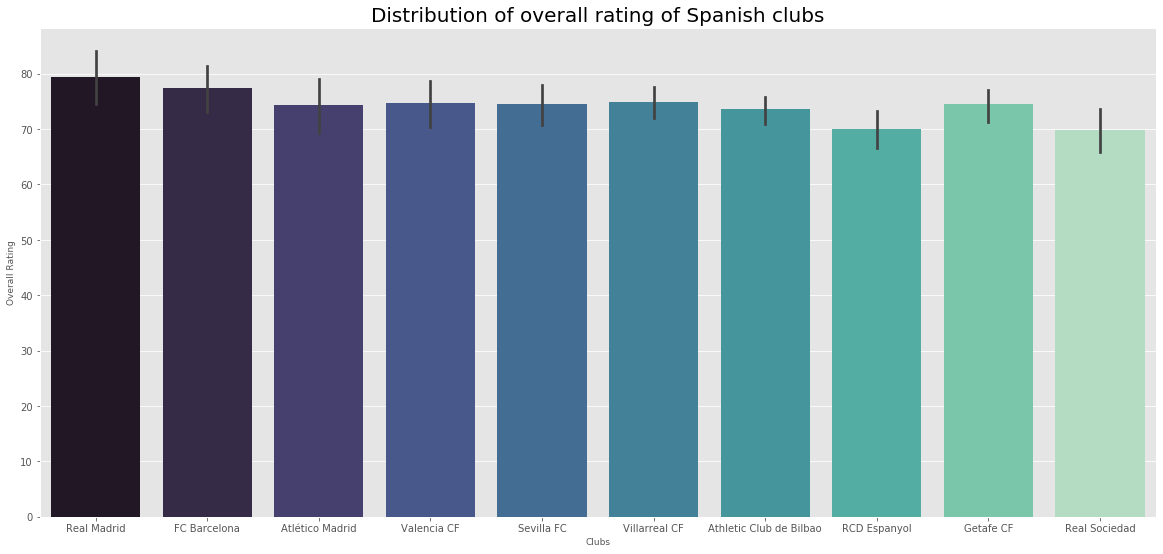

In [34]:
selected_clubs = ('Atlético Madrid', 'FC Barcelona', 'Real Madrid', 'Valencia CF', 'Sevilla FC', 'Villarreal CF',
             'Athletic Club de Bilbao', 'RCD Espanyol', 'Getafe CF', 'Real Sociedad')
data_clubs = Fifa.loc[Fifa['Club'].isin(selected_clubs) & Fifa['Overall']]

plt.rcParams['figure.figsize'] = (20,9)
ax = sns.barplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'mako')
ax.set_xlabel(xlabel = 'Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Rating', fontsize = 9)
ax.set_title(label = 'Distribution of overall rating of Spanish clubs', fontsize = 20)
plt.show()